<a href="https://colab.research.google.com/github/trishapollard/Cost-Estimation/blob/main/cost_estimation_in_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Create a list of project categories
categories = ['Commercial', 'Residential', 'Industrial', 'Public Works']

# Generate the project size in square feet (between 1,000 and 10,000 sq ft)
project_size = np.random.randint(1000, 10000, size=50)

# Base costs influenced by project size (larger projects tend to have higher costs)
material_costs = project_size * np.random.uniform(40, 60, size=50)  # $40 to $60 per sq ft
labor_costs = project_size * np.random.uniform(20, 40, size=50)  # $20 to $40 per sq ft
equipment_rentals = np.random.uniform(10000, 50000, size=50)  # Random equipment rental costs
subcontractor_costs = np.random.uniform(20000, 100000, size=50)  # Subcontractor costs

# Actual cost as the sum of all costs, with some random variability
actual_cost = material_costs + labor_costs + equipment_rentals + subcontractor_costs + np.random.uniform(-50000, 50000, size=50)

# Predicted cost with some noise added to simulate model prediction errors
predicted_cost = actual_cost + np.random.uniform(-0.1, 0.1, size=50) * actual_cost  # Predicted cost is within 10% of actual cost

# Generate the DataFrame
df = pd.DataFrame({
    'Project_ID': np.arange(1001, 1051),  # 50 project IDs
    'Project_Size_SqFt': project_size,
    'Material_Costs': material_costs.round(2),
    'Labor_Costs': labor_costs.round(2),
    'Equipment_Rentals': equipment_rentals.round(2),
    'Subcontractor_Costs': subcontractor_costs.round(2),
    'Actual_Cost': actual_cost.round(2),
    'Predicted_Cost': predicted_cost.round(2),
    'Category': np.random.choice(categories, size=50)
})

# Display the first few rows of the dataframe
print(df.head())

# Save the dataframe as a CSV
df.to_csv('project_data.csv', index=False)


   Project_ID  Project_Size_SqFt  Material_Costs  Labor_Costs  \
0        1001               8270       440381.19    247073.79   
1        1002               1860        85995.65     56645.66   
2        1003               6390       322064.69    182439.74   
3        1004               6191       315333.67    126967.40   
4        1005               6734       294256.20    149210.82   

   Equipment_Rentals  Subcontractor_Costs  Actual_Cost  Predicted_Cost  \
0           11475.48             47936.77    789699.08       793212.17   
1           34382.57             78076.45    247918.76       261306.05   
2           30107.16             91768.82    673045.90       634792.80   
3           12059.15             90966.91    591689.12       606231.72   
4           21145.86             82390.04    582303.86       534013.11   

       Category  
0   Residential  
1   Residential  
2    Commercial  
3  Public Works  
4   Residential  


In [ ]:
df

,Project_ID,Project_Size_SqFt,Material_Costs,Labor_Costs,Equipment_Rentals,Subcontractor_Costs,Actual_Cost,Predicted_Cost,Category
0,1001,8270,440381.19,247073.79,11475.48,47936.77,789699.08,793212.17,Residential
1,1002,1860,85995.65,56645.66,34382.57,78076.45,247918.76,261306.05,Residential
2,1003,6390,322064.69,182439.74,30107.16,91768.82,673045.90,634792.80,Commercial
3,1004,6191,315333.67,126967.40,12059.15,90966.91,591689.12,606231.72,Public Works
4,1005,6734,294256.20,149210.82,21145.86,82390.04,582303.86,534013.11,Residential
5,1006,7265,431480.65,149866.66,46330.64,71362.53,678485.36,617649.89,Public Works
6,1007,1466,81366.89,47979.55,19582.48,26731.20,164169.89,165199.39,Industrial
7,1008,5426,318994.43,142633.91,15795.79,32930.30,545468.10,549901.13,Residential
8,1009,6578,380843.49,198467.56,29578.11,91884.34,682465.69,701223.93,Residential
9,1010,9322,484352.47,355646.69,49426.02,68514.32,924888.78,966710.65,Industrial


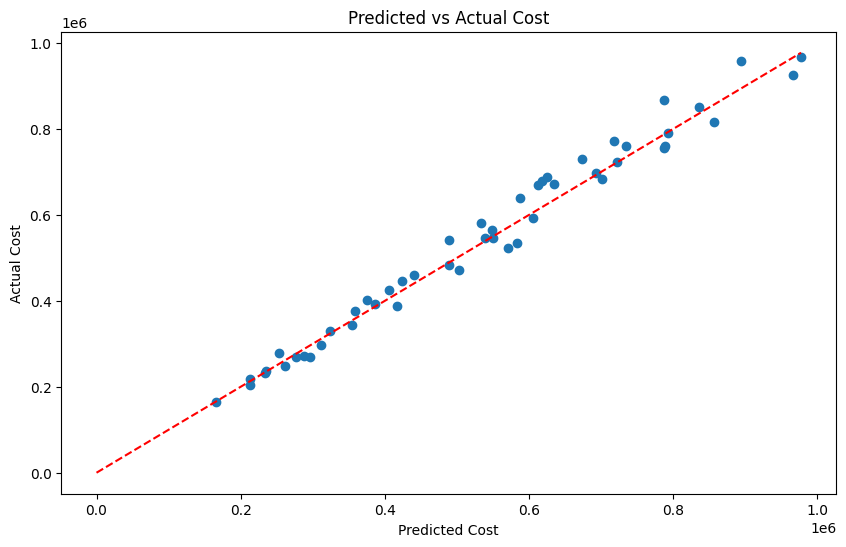

In [ ]:
# @title Predicted vs Actual Cost

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Predicted_Cost'], df['Actual_Cost'])
plt.xlabel('Predicted Cost')
plt.ylabel('Actual Cost')
plt.title('Predicted vs Actual Cost')

# Add a diagonal line for reference
max_val = max(df['Predicted_Cost'].max(), df['Actual_Cost'].max())
_ = plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')